# Advanced Lane Finding Project

The goals / steps of this project are the following:

- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Camera calibration [01-Camera Calibration](./01-Camera Calibration.ipynb)

In [2]:
# Loading camera calibration
cameraCalibration = pickle.load( open('./pickled_data/camera_calibration.p', 'rb' ) )
mtx, dist = map(cameraCalibration.get, ('mtx', 'dist'))

# Apply a distortion correction to raw images.

In [3]:
# Load test images.
testImages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), 
                      glob.glob('./test_images/*.jpg')))


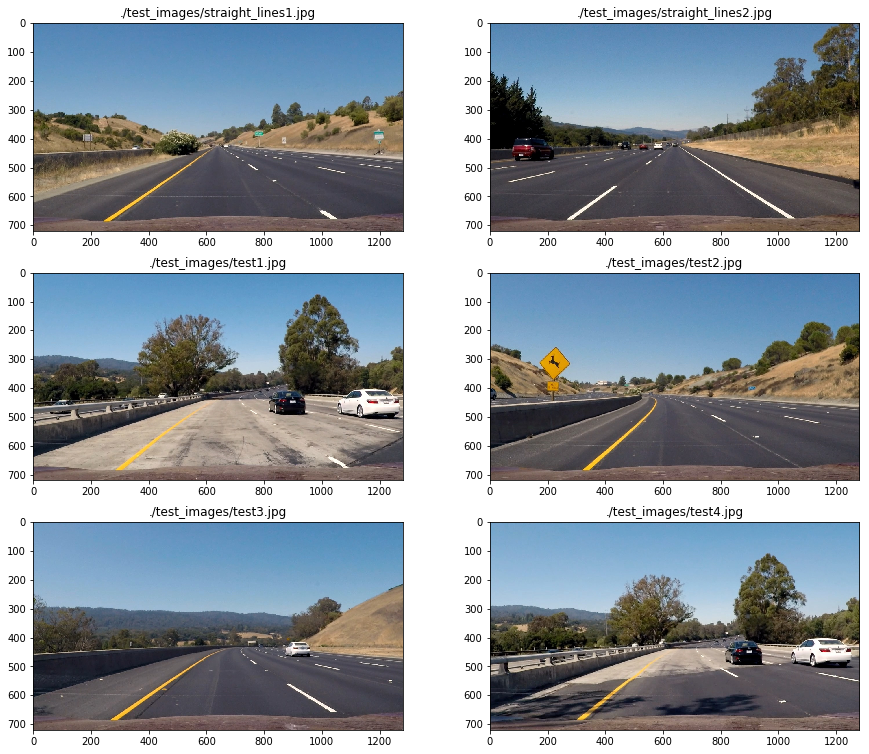

In [4]:
def showImages(images, cols = 4, rows = 5, figsize=(15,10)):
    """
    Display `images` on a [`cols`, `rows`] subplot grid.
    """
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax, index in zip(axes.flat, indexes):
        if index < imgLength:
            imagePathName, image = images[index]
            ax.imshow(image)
            ax.set_title(imagePathName)
        
showImages(list(map(lambda img: (img[0], cv2.cvtColor(img[1], cv2.COLOR_BGR2RGB)),testImages)), 2, 3, (15, 13))

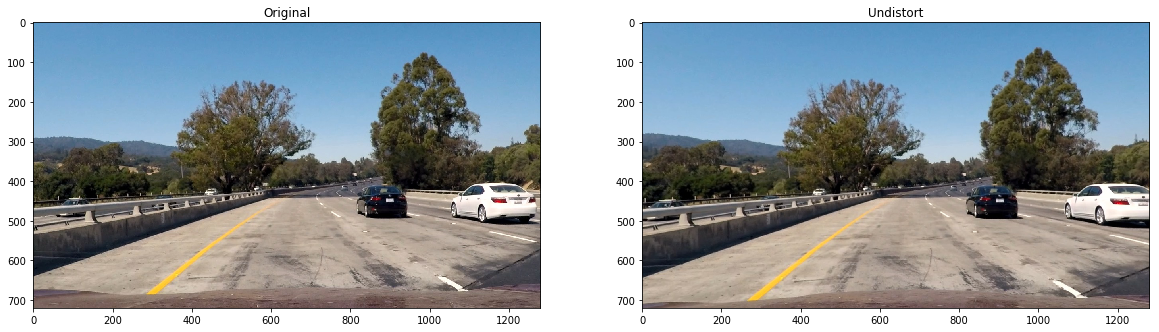

In [5]:
def imageSideBySide(leftImg, leftTitle, rightImg, rightTitle, figsize=(20,10)):
    """
    Display the images `leftImg` and `rightImg` side by side with image titles.
    """
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    axes[0].imshow(leftImg)
    axes[0].set_title(leftTitle)
    axes[1].imshow(rightImg)
    axes[1].set_title(rightTitle)
    
                
index = 2
original = testImages[index][1]
imageSideBySide(
    cv2.cvtColor(original, cv2.COLOR_BGR2RGB), 'Original',
    cv2.cvtColor(cv2.undistort(original, mtx, dist, None, mtx), cv2.COLOR_BGR2RGB), 'Undistort'
)

# Use color transforms, gradients, etc., to create a thresholded binary image.

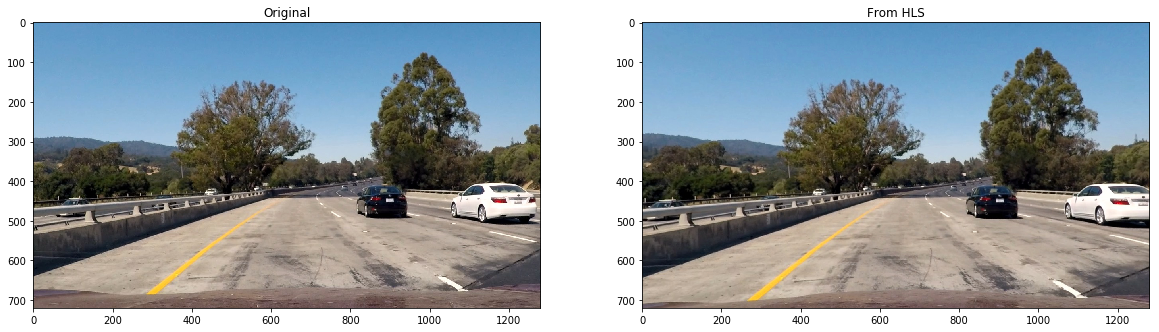

In [6]:
def undistortAndHLS(image, mtx=mtx, dist=dist):
    """
    Undistort the image with `mtx`, `dist` and convert it to HLS.
    """
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    return cv2.cvtColor(undist, cv2.COLOR_BGR2HLS)

hlsOriginal = undistortAndHLS(original)
imageSideBySide(
    cv2.cvtColor(original, cv2.COLOR_BGR2RGB), 'Original',
    cv2.cvtColor(hlsOriginal, cv2.COLOR_HLS2RGB), 'From HLS'
)

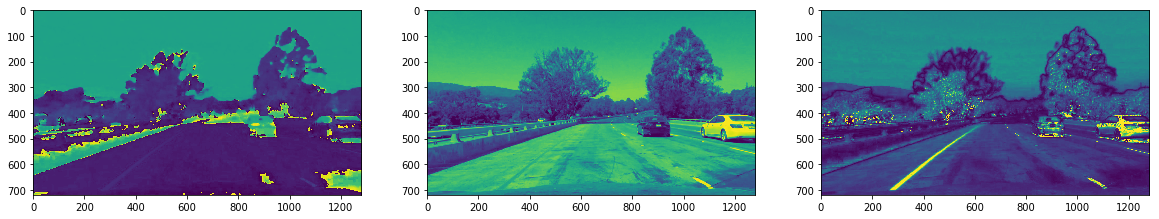

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(20,10))
for index, a in enumerate(axes):
    a.imshow(hlsOriginal[:,:,index])

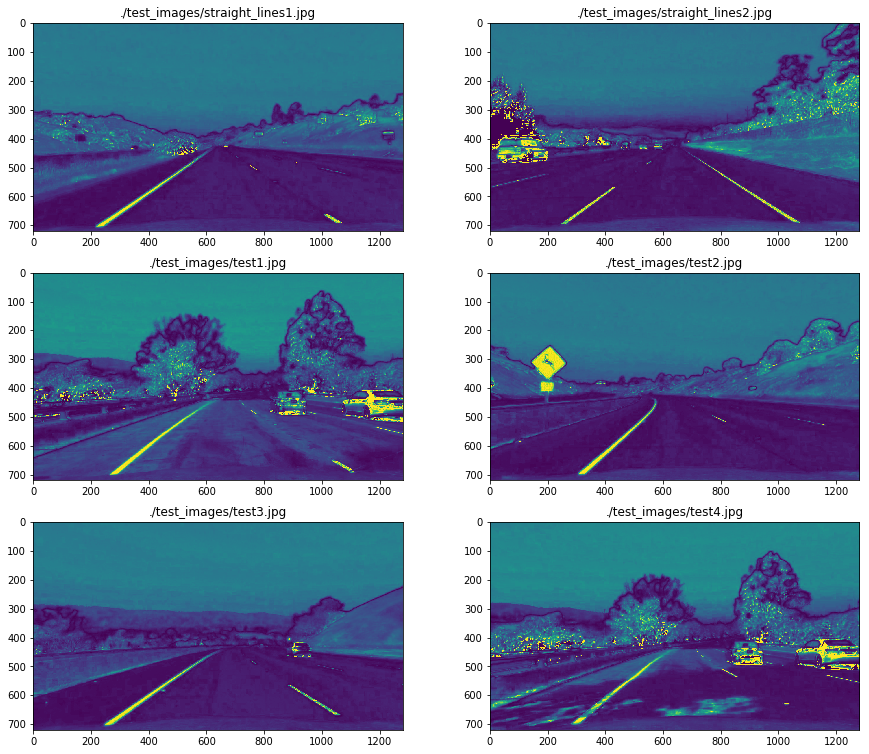

In [8]:
showImages(list(map(lambda img: (img[0], undistortAndHLS(img[1])[:,:,2]), testImages)), 2, 3, (15, 13))